## 7.2 Networks Using Blocks(VGG)
### 7.2.1 VGG Blocks

In [1]:
from d2l import mxnet as d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()

In [2]:
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3, padding=1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    return blk

In [3]:
def vgg(conv_arch):
    net = nn.Sequential()
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # RTX 2060 计算内存不足，因此缩小了全连接网络的大小
    net.add(nn.Dense(1024, activation='relu'), nn.Dropout(0.5),
            nn.Dense(1024, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

In [4]:
def net_details(net):
    X = np.random.uniform(size=(1, 1, 224, 224))
    for blk in net:
        X = blk(X)
        print(blk.name, 'output shape:\t', X.shape)

In [5]:
# Fig 7.2.1(P265)
# 8 层的 VGG-11 就是 11层，因为 (2,256) 里面有两层
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
net = vgg(conv_arch)
net.initialize()
net_details(net)

sequential1 output shape:	 (1, 64, 112, 112)
sequential2 output shape:	 (1, 128, 56, 56)
sequential3 output shape:	 (1, 256, 28, 28)
sequential4 output shape:	 (1, 512, 14, 14)
sequential5 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 1024)
dropout0 output shape:	 (1, 1024)
dense1 output shape:	 (1, 1024)
dropout1 output shape:	 (1, 1024)
dense2 output shape:	 (1, 10)


In [6]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
net.initialize()
net_details(net)

sequential7 output shape:	 (1, 16, 112, 112)
sequential8 output shape:	 (1, 32, 56, 56)
sequential9 output shape:	 (1, 64, 28, 28)
sequential10 output shape:	 (1, 128, 14, 14)
sequential11 output shape:	 (1, 128, 7, 7)
dense3 output shape:	 (1, 1024)
dropout2 output shape:	 (1, 1024)
dense4 output shape:	 (1, 1024)
dropout3 output shape:	 (1, 1024)
dense5 output shape:	 (1, 10)


loss 0.204, train acc 0.925, test acc 0.927
528.5 examples/sec on gpu(0)


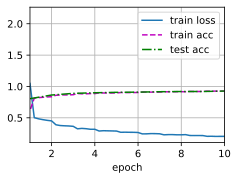

In [7]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

loss 0.111, train acc 0.959, test acc 0.934
526.9 examples/sec on gpu(0)


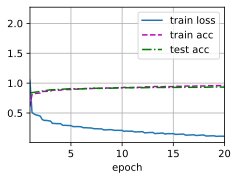

In [7]:
lr, num_epochs, batch_size = 0.05, 20, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

In [5]:
# 16 层的 VGG-16
conv_arch = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
ratio=4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
net.initialize()
net_details(net)

sequential1 output shape:	 (1, 16, 112, 112)
sequential2 output shape:	 (1, 32, 56, 56)
sequential3 output shape:	 (1, 64, 28, 28)
sequential4 output shape:	 (1, 128, 14, 14)
sequential5 output shape:	 (1, 128, 7, 7)
dense0 output shape:	 (1, 1024)
dropout0 output shape:	 (1, 1024)
dense1 output shape:	 (1, 1024)
dropout1 output shape:	 (1, 1024)
dense2 output shape:	 (1, 10)


loss 0.170, train acc 0.938, test acc 0.924
348.7 examples/sec on gpu(0)


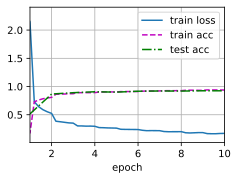

In [6]:
lr, num_epochs, batch_size = 0.05, 10, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

loss 0.070, train acc 0.974, test acc 0.934
379.1 examples/sec on gpu(0)


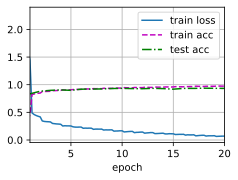

In [7]:
lr, num_epochs, batch_size = 0.05, 20, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

In [5]:
# 19 层的 VGG-19
conv_arch = ((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
ratio=4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
net.initialize()
net_details(net)

sequential1 output shape:	 (1, 16, 112, 112)
sequential2 output shape:	 (1, 32, 56, 56)
sequential3 output shape:	 (1, 64, 28, 28)
sequential4 output shape:	 (1, 128, 14, 14)
sequential5 output shape:	 (1, 128, 7, 7)
dense0 output shape:	 (1, 1024)
dropout0 output shape:	 (1, 1024)
dense1 output shape:	 (1, 1024)
dropout1 output shape:	 (1, 1024)
dense2 output shape:	 (1, 10)


loss 0.081, train acc 0.971, test acc 0.936
245.7 examples/sec on gpu(0)


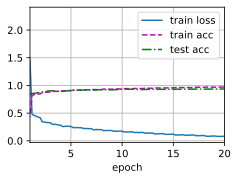

In [6]:
lr, num_epochs, batch_size = 0.05, 20, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)